In [3]:
import numpy as np
import pandas as pd
import copy
import scipy
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

### Collecting Historical data

In [4]:
datetime.date.today()

datetime.date(2020, 5, 27)

In [5]:
dia_d = pdr.get_data_yahoo('DIA', datetime.date.today()-datetime.timedelta(1826), datetime.date.today(), interval='d')

dia_m = pdr.get_data_yahoo('DIA', datetime.date.today()-datetime.timedelta(1835), datetime.date.today(), interval='m')

In [6]:
dia_d.index

DatetimeIndex(['2015-05-28', '2015-05-29', '2015-06-01', '2015-06-02',
               '2015-06-03', '2015-06-04', '2015-06-05', '2015-06-08',
               '2015-06-09', '2015-06-10',
               ...
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-26', '2020-05-27'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [7]:
dia_d

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-28,181.330002,180.649994,181.110001,181.289993,3660900.0,161.746262
2015-05-29,181.190002,179.669998,181.169998,180.110001,4923700.0,160.693512
2015-06-01,181.149994,179.809998,181.000000,180.399994,4349000.0,160.952240
2015-06-02,180.960007,179.270004,180.080002,180.149994,5106200.0,160.729187
2015-06-03,181.740005,180.119995,180.850006,180.880005,5481500.0,161.380508
...,...,...,...,...,...,...
2020-05-20,246.580002,244.729996,245.399994,245.729996,3280600.0,245.729996
2020-05-21,247.380005,243.880005,245.550003,245.020004,3378200.0,245.020004
2020-05-22,245.100006,243.169998,244.910004,244.880005,2521100.0,244.880005


In [8]:
dia_d['2019-12-01':'2019-12-31']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-02,281.489990,278.200012,281.450012,278.200012,2544300.0,274.944550
2019-12-03,275.640015,273.619995,275.429993,275.510010,3834300.0,272.286011
2019-12-04,277.760010,276.609985,277.000000,277.049988,1928500.0,273.808014
2019-12-05,277.859985,276.149994,277.859985,277.359985,1453000.0,274.114349
2019-12-06,280.940002,279.390015,279.450012,280.700012,2686400.0,277.415253
2019-12-09,280.720001,279.700012,280.440002,279.760010,1206100.0,276.486267
2019-12-10,280.140015,278.630005,279.690002,279.459991,1406900.0,276.189789
2019-12-11,279.899994,278.649994,279.130005,279.720001,1921700.0,276.446777
2019-12-12,282.950012,279.239990,279.519989,281.950012,3768600.0,278.650696


In [9]:
dia_m

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-06-01,181.940002,175.449997,181.000000,175.820007,111271300.0,156.866013
2015-07-01,181.250000,173.779999,177.570007,176.679993,95582100.0,158.051605
2015-08-01,176.869995,150.570007,176.820007,165.179993,209167000.0,147.904663
2015-09-01,169.440002,159.179993,161.399994,162.619995,177477100.0,146.084427
2015-10-01,177.830002,159.929993,163.009995,176.490005,143995600.0,158.856476
...,...,...,...,...,...,...
2020-02-01,295.869995,247.000000,283.690002,254.559998,91710500.0,252.468353
2020-03-01,271.109985,182.100006,256.709991,219.229996,254951200.0,218.027374
2020-04-01,247.669998,207.179993,210.649994,243.220001,138584800.0,242.611298


# Key Performance Indicators

### 1. CAGR

Compound annual growth rate (CAGR) is the rate of return that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each year of the investment’s lifespan.
- CAGR is one of the most accurate ways to calculate and determine returns for anything that can rise or fall in value over time.
- Investors can compare the CAGR of two alternatives in order to evaluate how well one stock performed against other stocks in a peer group or against a market index.
- CAGR does not reflect investment risk.

In [10]:
def CAGR(ret,p):
    "funtion to calculate the Cumulative Annual Growth Rate of a strategy"
    cum_return = (1+ret).cumprod()
    n = len(ret)/p
    CAGR = (cum_return.tolist()[-1])**(1/n) - 1
    return CAGR

In [11]:
# %change from previous day
dia_d['Adj Close'].pct_change()

Date
2015-05-28         NaN
2015-05-29   -0.006509
2015-06-01    0.001610
2015-06-02   -0.001386
2015-06-03    0.004052
                ...   
2020-05-20    0.014491
2020-05-21   -0.002889
2020-05-22   -0.000571
2020-05-26    0.021929
2020-05-27    0.011748
Name: Adj Close, Length: 1259, dtype: float64

In [12]:
dia_d['daily_ret'] = dia_d['Adj Close'].pct_change()

In [13]:
dia_d['cum_daily_ret'] = (1 + dia_d['daily_ret']).cumprod()

In [14]:
dia_d

,High,Low,Open,Close,Volume,Adj Close,daily_ret,cum_daily_ret
Date,,,,,,,,
2015-05-28,181.330002,180.649994,181.110001,181.289993,3660900.0,161.746262,NaN,NaN
2015-05-29,181.190002,179.669998,181.169998,180.110001,4923700.0,160.693512,-0.006509,0.993491
2015-06-01,181.149994,179.809998,181.000000,180.399994,4349000.0,160.952240,0.001610,0.995091
2015-06-02,180.960007,179.270004,180.080002,180.149994,5106200.0,160.729187,-0.001386,0.993712
2015-06-03,181.740005,180.119995,180.850006,180.880005,5481500.0,161.380508,0.004052,0.997739
...,...,...,...,...,...,...,...,...
2020-05-20,246.580002,244.729996,245.399994,245.729996,3280600.0,245.729996,0.014491,1.519231
2020-05-21,247.380005,243.880005,245.550003,245.020004,3378200.0,245.020004,-0.002889,1.514842
2020-05-22,245.100006,243.169998,244.910004,244.880005,2521100.0,244.880005,-0.000571,1.513976


In [15]:
dia_m['Adj Close'].pct_change()

Date
2015-06-01         NaN
2015-07-01    0.007558
2015-08-01   -0.064200
2015-09-01   -0.012307
2015-10-01    0.087429
                ...   
2020-02-01   -0.098223
2020-03-01   -0.136417
2020-04-01    0.112756
2020-05-01    0.029472
2020-05-27    0.013726
Name: Adj Close, Length: 61, dtype: float64

In [16]:
dia_m['mon_ret'] = dia_m['Adj Close'].pct_change()

In [17]:
dia_m['cum_mon_ret'] = (1 + dia_m['mon_ret']).cumprod()

In [18]:
dia_m

,High,Low,Open,Close,Volume,Adj Close,mon_ret,cum_mon_ret
Date,,,,,,,,
2015-06-01,181.940002,175.449997,181.000000,175.820007,111271300.0,156.866013,NaN,NaN
2015-07-01,181.250000,173.779999,177.570007,176.679993,95582100.0,158.051605,0.007558,1.007558
2015-08-01,176.869995,150.570007,176.820007,165.179993,209167000.0,147.904663,-0.064200,0.942873
2015-09-01,169.440002,159.179993,161.399994,162.619995,177477100.0,146.084427,-0.012307,0.931269
2015-10-01,177.830002,159.929993,163.009995,176.490005,143995600.0,158.856476,0.087429,1.012689
...,...,...,...,...,...,...,...,...
2020-02-01,295.869995,247.000000,283.690002,254.559998,91710500.0,252.468353,-0.098223,1.609452
2020-03-01,271.109985,182.100006,256.709991,219.229996,254951200.0,218.027374,-0.136417,1.389896
2020-04-01,247.669998,207.179993,210.649994,243.220001,138584800.0,242.611298,0.112756,1.546615


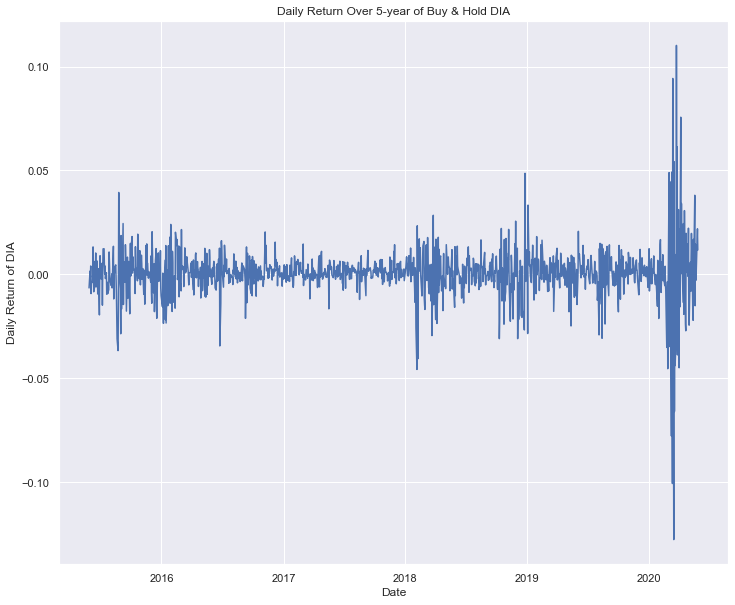

In [19]:
plt.figure(figsize = (12,10))
sns.lineplot(x=dia_d.index, y='daily_ret',data=dia_d);
plt.title('Daily Return Over 5-year of Buy & Hold DIA');
plt.ylabel('Daily Return of DIA');

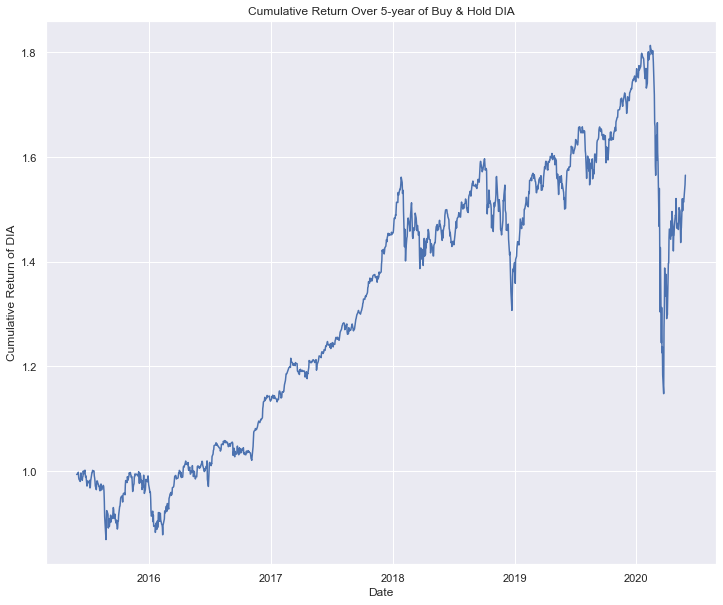

In [20]:
plt.figure(figsize = (12,10))
sns.lineplot(x=dia_d.index, y='cum_daily_ret',data=dia_d);
plt.title('Cumulative Return Over 5-year of Buy & Hold DIA');
plt.ylabel('Cumulative Return of DIA');

In [21]:
dia_d

,High,Low,Open,Close,Volume,Adj Close,daily_ret,cum_daily_ret
Date,,,,,,,,
2015-05-28,181.330002,180.649994,181.110001,181.289993,3660900.0,161.746262,NaN,NaN
2015-05-29,181.190002,179.669998,181.169998,180.110001,4923700.0,160.693512,-0.006509,0.993491
2015-06-01,181.149994,179.809998,181.000000,180.399994,4349000.0,160.952240,0.001610,0.995091
2015-06-02,180.960007,179.270004,180.080002,180.149994,5106200.0,160.729187,-0.001386,0.993712
2015-06-03,181.740005,180.119995,180.850006,180.880005,5481500.0,161.380508,0.004052,0.997739
...,...,...,...,...,...,...,...,...
2020-05-20,246.580002,244.729996,245.399994,245.729996,3280600.0,245.729996,0.014491,1.519231
2020-05-21,247.380005,243.880005,245.550003,245.020004,3378200.0,245.020004,-0.002889,1.514842
2020-05-22,245.100006,243.169998,244.910004,244.880005,2521100.0,244.880005,-0.000571,1.513976


In [22]:
dia_d['cum_daily_ret'][-1]**(252/len(dia_d['daily_ret']))-1

0.09383892915784142

In [23]:
CAGR(dia_d['daily_ret'],252)

0.09383892915784142

In [24]:
CAGR(dia_m['mon_ret'],12)

0.09875747279328251

### 2. Volatility
Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is often measured as either the standard deviation or variance between returns from that same security or market index.

When we use the SD of returns as a measure of risk, we are assuming that returns are notmally distributed. However, keep in mind that this most frequently underestimates the tail risk, as returns of investments rarely follow anormal distribution.

Risk management in Finance is beyond the scope of our tutorial, but keep in mind that KPIs incorporating rish using only volatility (SD of returns) assume normal distribution

In [25]:
def volatility(ret,p):
    "function to calculate annualized volatility of returns from a strategy"
    vol = ret.std()*np.sqrt(p)
    return vol

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


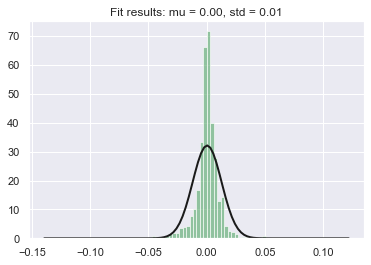

In [26]:
from scipy.stats import norm

# fit a normal distributio to the price data
mu, std = norm.fit(dia_d['daily_ret'].dropna())

# plot the histogram of actual daily returns.
plt.hist(dia_d['daily_ret'], bins=80, density=True, alpha=0.6, color='g')

# plot the PDF assuming the price data is normally distributed.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [27]:
dia_d['daily_ret'].std()

0.012418311089991725

In [28]:
volatility(dia_d['daily_ret'], 252) # yearly

0.19713457708532134

In [29]:
volatility(dia_m['mon_ret'], 12) # monthly

0.15109571211280554

### 3. Sharpe Ratio

The Sharpe ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.

Drawback: assume returns follow a normal distribution, which means,the chance of hugh drawdown in reality is underestimated.

In [30]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.myaccountingcourse.com/wp-content/uploads/2017/10/sharpe-ratio-formula.jpg")

In [31]:
def sharpe(ret, rf, p):
    "funtion to calculate sharpe ratio of a strategy; rf is the risk-free rate"
    sr = (CAGR(ret, p) - rf)/volatility(ret, p)
    return sr

In [32]:
sharpe(dia_m['mon_ret'], 0.0010, 12)

0.6469903839514546

In [33]:
sharpe(dia_d['daily_ret'], 0.0010, 12)

0.07625248113084261

## Building A Simple Strategy

The goal of an investment strategy is to beat the performance of passive "buy & hold" of an ETF such as the DIA that tracks the Dow or some other index fund.

In [34]:
amzn = pdr.get_data_yahoo('amzn', datetime.date.today()-datetime.timedelta(1826), datetime.date.today(), interval='d')

In [35]:
amzn

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-28,431.350006,425.470001,429.709991,426.570007,1912400,426.570007
2015-05-29,432.500000,427.230011,427.230011,429.230011,3016100,429.230011
2015-06-01,433.160004,426.200012,430.399994,430.920013,2253300,430.920013
2015-06-02,433.230011,426.250000,430.070007,430.989990,1668900,430.989990
2015-06-03,438.390015,432.750000,434.399994,436.589996,2727900,436.589996
...,...,...,...,...,...,...
2020-05-20,2500.010010,2467.270020,2477.870117,2497.939941,3998100,2497.939941
2020-05-21,2525.449951,2442.540039,2500.000000,2446.739990,5114400,2446.739990
2020-05-22,2469.850098,2430.129883,2455.010010,2436.879883,2867100,2436.879883


#### Simple Moving Average (SMA)

A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.

- A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.
- The SMA is a technical indicator that can aid in determining if an asset price will continue or reverse a bull or bear trend.
- The SMA can be enhanced as an exponential moving average (EMA) that more heavily weights recent price action.

In [64]:
# initialize short and long windows
short_window = 50
long_window = 150

# initialize 'signals' DataFrame with 'sma_short_above' column
signals = pd.DataFrame(index=amzn.index)
signals['sma_short_above'] = 0.0

# create short simple moving average over short window
signals['sma_short'] = amzn['Adj Close'].rolling(window=short_window, min_periods=1).mean()

# create long simple moving average over short window
signals['sma_long'] = amzn['Adj Close'].rolling(window=long_window, min_periods=1).mean()

# create signals when sma_short is above sma_long
signals['sma_short_above'] = np.where(signals['sma_short'] 
                                    > signals['sma_long'], 1.0, 0.0)

# generate trading orders
signals['positions'] = signals['sma_short_above'].diff()
signals['positions'].fillna(method='bfill', inplace=True)

In [65]:
signals.iloc[100:150,:]

,sma_short_above,sma_short,sma_long,positions
Date,,,,
2015-10-19,1.0,525.428000,494.054403,0.0
2015-10-20,1.0,526.165601,495.370903,0.0
2015-10-21,1.0,526.731801,496.619403,0.0
2015-10-22,1.0,527.491801,497.948603,0.0
2015-10-23,1.0,528.879202,499.573003,0.0
2015-10-26,1.0,530.421001,501.351303,0.0
2015-10-27,1.0,531.936802,503.191903,0.0
2015-10-28,1.0,533.578401,505.127903,0.0
2015-10-29,1.0,535.451001,507.138602,0.0


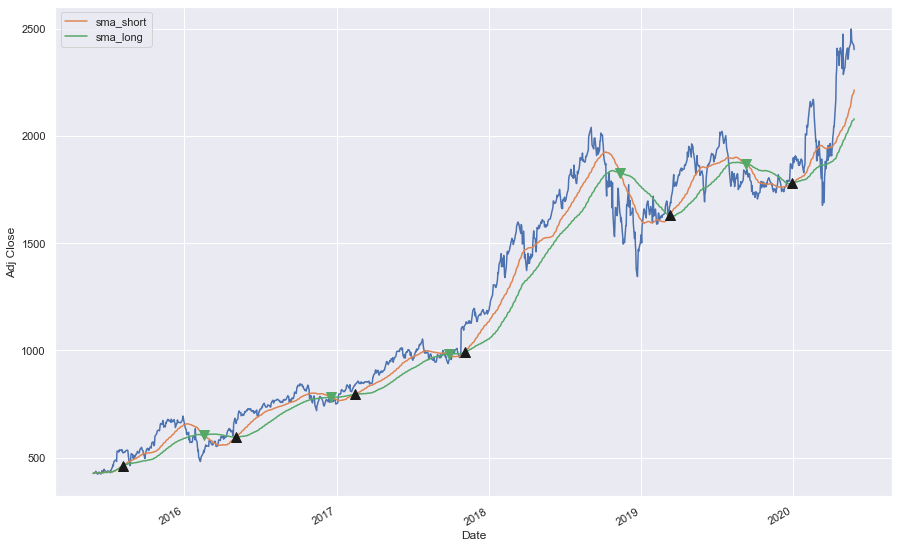

In [72]:
# initialize plot figure
fig = plt.figure(figsize=(15,10))

# add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price in $')

# plot closing price
sns.lineplot(x=amzn.index, y='Adj Close', data=amzn);

# plot short and long moving averages
signals[['sma_short', 'sma_long']].plot(ax=ax1)

# plot buy singals
ax1.plot(signals[signals['positions'] == 1.0].index, 
         signals.sma_short[signals['positions'] == 1.0],
        '^', markersize=10, color='k')

# plot sell signal
ax1.plot(signals[signals['positions'] == -1.0].index, 
         signals.sma_short[signals['positions'] == -1.0],
        'v', markersize=10, color='g')

# show the plot
plt.show()

In [82]:
# set initial capital
initial_capital = float(100000.0)

# create a DataFrame(portfolio)
portfolio = pd.DataFrame(index=signals.index)

# we have 100 shares of amzn in the portfolio whenever short sma is above long sma
portfolio['AMZN_s'] = 100*signals['sma_short_above']

# calculate AMZN value owned
portfolio['AMZN_v'] = portfolio['AMZN_s'].multiply(amzn['Adj Close'], axis=0)

# store the difference in shares owned
portfolio['share_diff'] = (portfolio['AMZN_s'].diff()).fillna(method='bfill')

# add 'cash' to portfolio
portfolio['cash'] = initial_capital - (portfolio['share_diff'].multiply(amzn['Adj Close'], axis=0)).cumsum()

# add 'total' to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['AMZN_v']

# add 'return' to portfolio
portfolio['daily_returns'] = portfolio['total'].pct_change()

In [83]:
portfolio.iloc[35:80,:]

,AMZN_s,AMZN_v,share_diff,cash,total,daily_returns
Date,,,,,,
2015-07-17,0.0,0.000000,0.0,100000.000000,100000.000000,0.000000
2015-07-20,0.0,0.000000,0.0,100000.000000,100000.000000,0.000000
2015-07-21,0.0,0.000000,0.0,100000.000000,100000.000000,0.000000
2015-07-22,0.0,0.000000,0.0,100000.000000,100000.000000,0.000000
2015-07-23,0.0,0.000000,0.0,100000.000000,100000.000000,0.000000
2015-07-24,0.0,0.000000,0.0,100000.000000,100000.000000,0.000000
2015-07-27,0.0,0.000000,0.0,100000.000000,100000.000000,0.000000
2015-07-28,0.0,0.000000,0.0,100000.000000,100000.000000,0.000000
2015-07-29,0.0,0.000000,0.0,100000.000000,100000.000000,0.000000


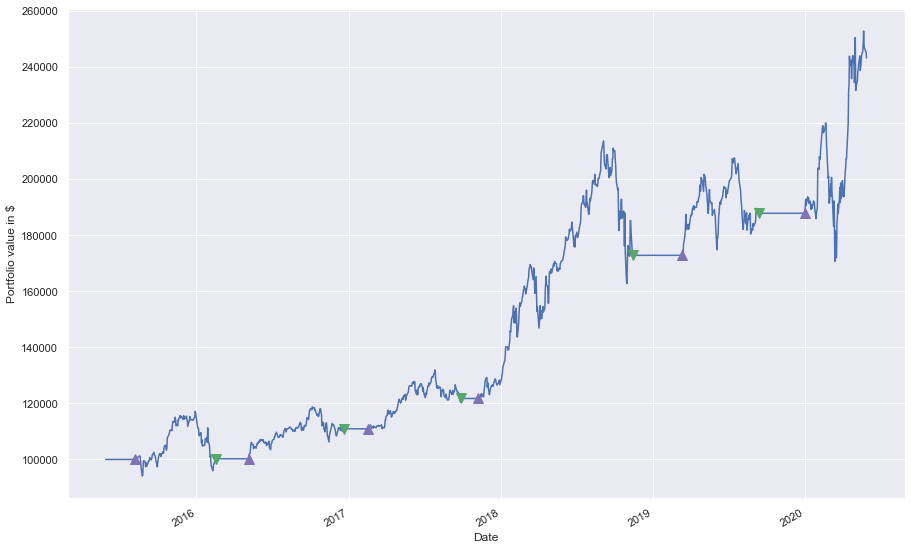

In [84]:
# initialize plot figure
fig = plt.figure(figsize=(15,10))

# add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# plot equity curve in dollars
portfolio['total'].plot(ax=ax1)

# plot buy trades against equity curve
ax1.plot(portfolio[signals['positions'] == 1.0].index, 
         portfolio.total[signals['positions'] == 1.0],
        '^', markersize=10, color='m')

# plot sell  trades againist equity curve
ax1.plot(portfolio[signals['positions'] == -1.0].index, 
         portfolio.total[signals['positions'] == -1.0],
        'v', markersize=10, color='g')

# show the plot
plt.show()

In [85]:
CAGR(portfolio['daily_returns'],252)

0.19464933995869815

In [86]:
volatility(portfolio['daily_returns'],252)

0.21299995210409955

In [87]:
sharpe(portfolio['daily_returns'],0.0010,252)

0.9091520352270118

In [88]:
amzn['daily_ret'] = amzn['Adj Close'].pct_change()

In [89]:
CAGR(amzn['daily_ret'],252)

0.41325749868263184

In [90]:
volatility(amzn['daily_ret'],252)

0.29874901225697237

In [91]:
sharpe(amzn['daily_ret'],0.0010,252)

1.3799459806348209